<a href="https://colab.research.google.com/github/SAMIHA-BGM/Handwritten-Digit-Classification-using-ANN-and-CNN-MNIST-Dataset-/blob/main/dummybavaCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

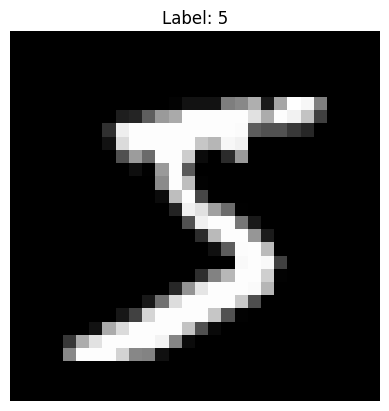

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

dense_history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8677 - loss: 0.4663 - val_accuracy: 0.9662 - val_loss: 0.1212
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9605 - loss: 0.1338 - val_accuracy: 0.9735 - val_loss: 0.0980
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9737 - loss: 0.0901 - val_accuracy: 0.9752 - val_loss: 0.0867
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0629 - val_accuracy: 0.9770 - val_loss: 0.0829
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0462 - val_accuracy: 0.9757 - val_loss: 0.0897


In [ ]:
dense_test_loss, dense_test_acc = model.evaluate(x_test, y_test)
print("Dense Model Test Accuracy:", dense_test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.0933
Dense Model Test Accuracy: 0.9761000275611877


In [ ]:
x_train_cnn = x_train[..., tf.newaxis]
x_test_cnn = x_test[..., tf.newaxis]
print(x_train_cnn.shape)


(60000, 28, 28, 1)


In [ ]:
cnn_model = tf.keras.Sequential([
    # First Convolutional Layer: Detects low-level features like edges.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel

    # Max Pooling: Downsample to reduce dimensionality.
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer: Detects more complex features.
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel

    # Max Pooling again to reduce the size further.
    layers.MaxPooling2D((2, 2)),

    # Flatten the output of the previous layers for the fully connected layers.
    layers.Flatten(),

    # Fully Connected Layer: This layer learns non-linear combinations of features.
    layers.Dense(64, activation='relu'),

    # Output Layer: 10 classes for digits 0-9.
    layers.Dense(10, activation='softmax')  # Softmax for multi-class classification
])


In [ ]:
cnn_model.compile(
    optimizer='adam',  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)


In [ ]:
cnn_history = cnn_model.fit(
    x_train_cnn, y_train,  # training label
    epochs=5,              # epochsU
    validation_split=0.1   # 10% for validation
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.8938 - loss: 0.3506 - val_accuracy: 0.9732 - val_loss: 0.0904
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9829 - loss: 0.0537 - val_accuracy: 0.9848 - val_loss: 0.0537
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9889 - loss: 0.0361 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9910 - val_loss: 0.0322
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9903 - val_loss: 0.0364


In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Model Test Accuracy:", cnn_test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9841 - loss: 0.0498
CNN Model Test Accuracy: 0.987500011920929


In [ ]:
#test accuracy
print(f"Dense Accuracy: {dense_test_acc:.4f}")
print(f"CNN Accuracy: {cnn_test_acc:.4f}")


Dense Accuracy: 0.9761
CNN Accuracy: 0.9875
